In [2]:
using Pkg;
Pkg.activate(".");
Pkg.instantiate();
using LinearAlgebra, DataFrames, Plots, StatsPlots, LaTeXStrings; pyplot();
using Random, PyCall, Statistics, StatsBase, MLDataUtils;
using JLD;
include("nntutorial.jl");

 Activating environment at `~/Documents/GitHub/NNtutorial/Project.toml`


In [3]:
mnist_data = load("mnist_data.jld");

In [7]:
images = mnist_data["jl_images"];
targets = mnist_data["jl_targets"];
data = mnist_data["jl_data"];

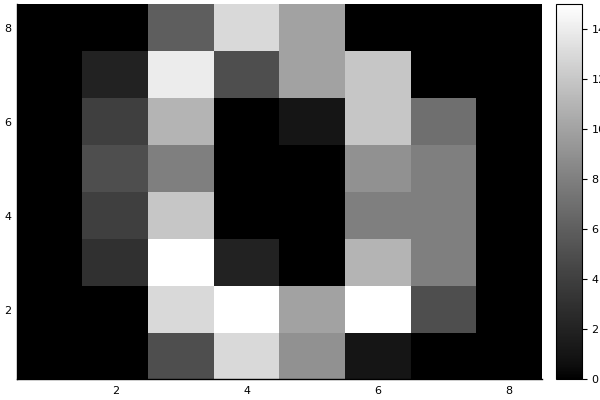

In [8]:
# visualization 
heatmap(images[1,:,:], color = :greys)

In [9]:
# normalize the data
X = standardize(ZScoreTransform, data, dims=1);
function remove_nans(x)
    if isnan(x)
        return 0.0
    else 
        return x
    end
end
X = remove_nans.(X);

In [13]:
# split the data
(x_train,y_train), (x_test,y_test) = splitobs((X', targets), at = 0.6);

In [14]:
yvtrain = nntutorial.convertytovect(y_train);
yvtest = nntutorial.convertytovect(y_test);

In [17]:
nn_structure = (64,30,10);

In [18]:
W, b, avg_cost_func = nntutorial.train_nn(nn_structure, x_train', yvtrain);

Starting gradient descent for 3000 iterations.
Iteration 0 of 3000 iterations.
Iteration 1000 of 3000 iterations.
Iteration 2000 of 3000 iterations.


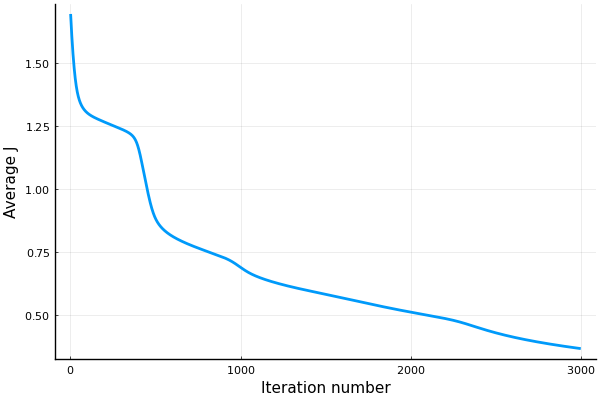

In [19]:
plot(avg_cost_func,legend=false,lw=2)
xlabel!("Iteration number")
ylabel!("Average J")